___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project_1/Churn_Modelling.csv")

In [4]:
from matplotlib import style
style.use('dark_background')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df_object = df.select_dtypes(include ="object").head()
df_object

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [ ]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

Surname                       : 2932
Geography                     : 3
Gender                        : 2


In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [13]:
df2 = df.drop(columns=["RowNumber","CustomerId","Surname"])
            

In [14]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [15]:
df_numeric = df2.select_dtypes(include ="number")
df_numeric

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0
9996,516,35,10,57369.610,1,1,1,101699.770,0
9997,709,36,7,0.000,1,0,1,42085.580,1
9998,772,42,3,75075.310,2,1,0,92888.520,1


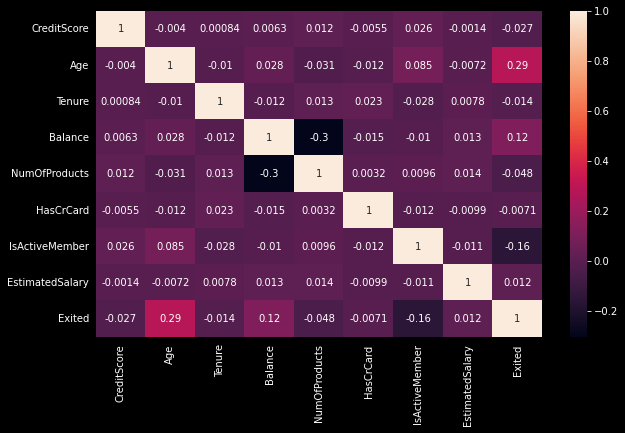

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot =True)

In [17]:
print("+0.9 ile +1 coor = ", df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any())
print("-0.9 ile -1 coor = ", df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any())

+0.9 ile +1 coor =  False
-0.9 ile -1 coor =  False


In [ ]:
### later look at outsiders


# Preprocessing of Data
- Train | Test Split, Scalling

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

In [19]:
X= df2.drop(columns="Exited")
y= df2.Exited

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)



In [24]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

Surname                       : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography                     : ['France' 'Spain' 'Germany']
Gender                        : ['Female' 'Male']


In [25]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

In [26]:
cat_onehot = ['Geography', 'Gender']


In [27]:
X_train[cat_onehot].head()

,Geography,Gender
6861,Spain,Male
9881,Spain,Female
4536,France,Female
8430,France,Female
6765,France,Female


In [28]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

enc.fit_transform(X_train[cat_onehot])

array([[0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

In [29]:
enc.get_feature_names_out(cat_onehot)

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [30]:
X_train_onehot = pd.DataFrame(enc.fit_transform(X_train[cat_onehot]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat_onehot))
X_train_onehot


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6861,0.000,0.000,1.000,0.000,1.000
9881,0.000,0.000,1.000,1.000,0.000
4536,1.000,0.000,0.000,1.000,0.000
8430,1.000,0.000,0.000,1.000,0.000
6765,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...
599,0.000,1.000,0.000,1.000,0.000
5695,1.000,0.000,0.000,0.000,1.000
8006,0.000,1.000,0.000,0.000,1.000
1361,1.000,0.000,0.000,0.000,1.000


In [31]:
X_train_numeric = X_train.select_dtypes("number")
X_train_numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6861,605,41,5,103154.660,1,0,0,143203.780
9881,687,40,1,0.000,2,1,0,8207.360
4536,642,55,7,0.000,2,1,1,101515.760
8430,612,38,7,110615.470,1,1,1,193502.930
6765,461,40,7,0.000,2,1,0,176547.800


In [32]:
X_train_new = X_train_numeric.join([X_train_onehot])
X_train_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6861,605,41,5,103154.660,1,0,0,143203.780,0.000,0.000,1.000,0.000,1.000
9881,687,40,1,0.000,2,1,0,8207.360,0.000,0.000,1.000,1.000,0.000
4536,642,55,7,0.000,2,1,1,101515.760,1.000,0.000,0.000,1.000,0.000
8430,612,38,7,110615.470,1,1,1,193502.930,1.000,0.000,0.000,1.000,0.000
6765,461,40,7,0.000,2,1,0,176547.800,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,484,34,4,148249.540,1,0,1,33738.270,0.000,1.000,0.000,1.000,0.000
5695,787,46,7,117685.310,2,1,1,93360.350,1.000,0.000,0.000,0.000,1.000
8006,716,41,8,126145.540,2,1,1,138051.190,0.000,1.000,0.000,0.000,1.000
1361,578,32,4,0.000,2,1,1,141822.800,1.000,0.000,0.000,0.000,1.000


In [ ]:
########## TEST PART #####

In [33]:
type(df2)


pandas.core.frame.DataFrame

In [34]:
cat_onehot

['Geography', 'Gender']

In [35]:
X_test_onehot = pd.DataFrame(enc.transform(X_test[cat_onehot]), index = X_test.index, 
                             columns = enc.get_feature_names_out(cat_onehot))
X_test_onehot

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6676,0.000,0.000,1.000,0.000,1.000
6421,1.000,0.000,0.000,0.000,1.000
9834,1.000,0.000,0.000,1.000,0.000
8492,1.000,0.000,0.000,0.000,1.000
9982,0.000,1.000,0.000,1.000,0.000
...,...,...,...,...,...
4441,1.000,0.000,0.000,1.000,0.000
4166,0.000,0.000,1.000,1.000,0.000
2567,1.000,0.000,0.000,0.000,1.000
8527,0.000,0.000,1.000,0.000,1.000


In [36]:
X_test_numeric = X_test.select_dtypes("number")
X_test_numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6676,619,52,8,0.000,2,1,1,123242.110
6421,616,23,8,73112.950,1,1,1,62733.050
9834,516,46,6,62212.290,1,0,1,171681.860
8492,494,28,9,114731.760,2,0,1,79479.740
9982,655,46,7,137145.120,1,1,0,115146.400


In [37]:
X_test_new = X_test_numeric.join([X_test_onehot])
X_test_new


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6676,619,52,8,0.000,2,1,1,123242.110,0.000,0.000,1.000,0.000,1.000
6421,616,23,8,73112.950,1,1,1,62733.050,1.000,0.000,0.000,0.000,1.000
9834,516,46,6,62212.290,1,0,1,171681.860,1.000,0.000,0.000,1.000,0.000
8492,494,28,9,114731.760,2,0,1,79479.740,1.000,0.000,0.000,0.000,1.000
9982,655,46,7,137145.120,1,1,0,115146.400,0.000,1.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,624,38,3,0.000,2,1,1,163666.850,1.000,0.000,0.000,1.000,0.000
4166,850,45,5,174088.300,4,1,0,5669.310,0.000,0.000,1.000,1.000,0.000
2567,553,42,1,0.000,2,0,0,23822.040,1.000,0.000,0.000,0.000,1.000
8527,694,39,3,0.000,1,1,1,95625.030,0.000,0.000,1.000,0.000,1.000


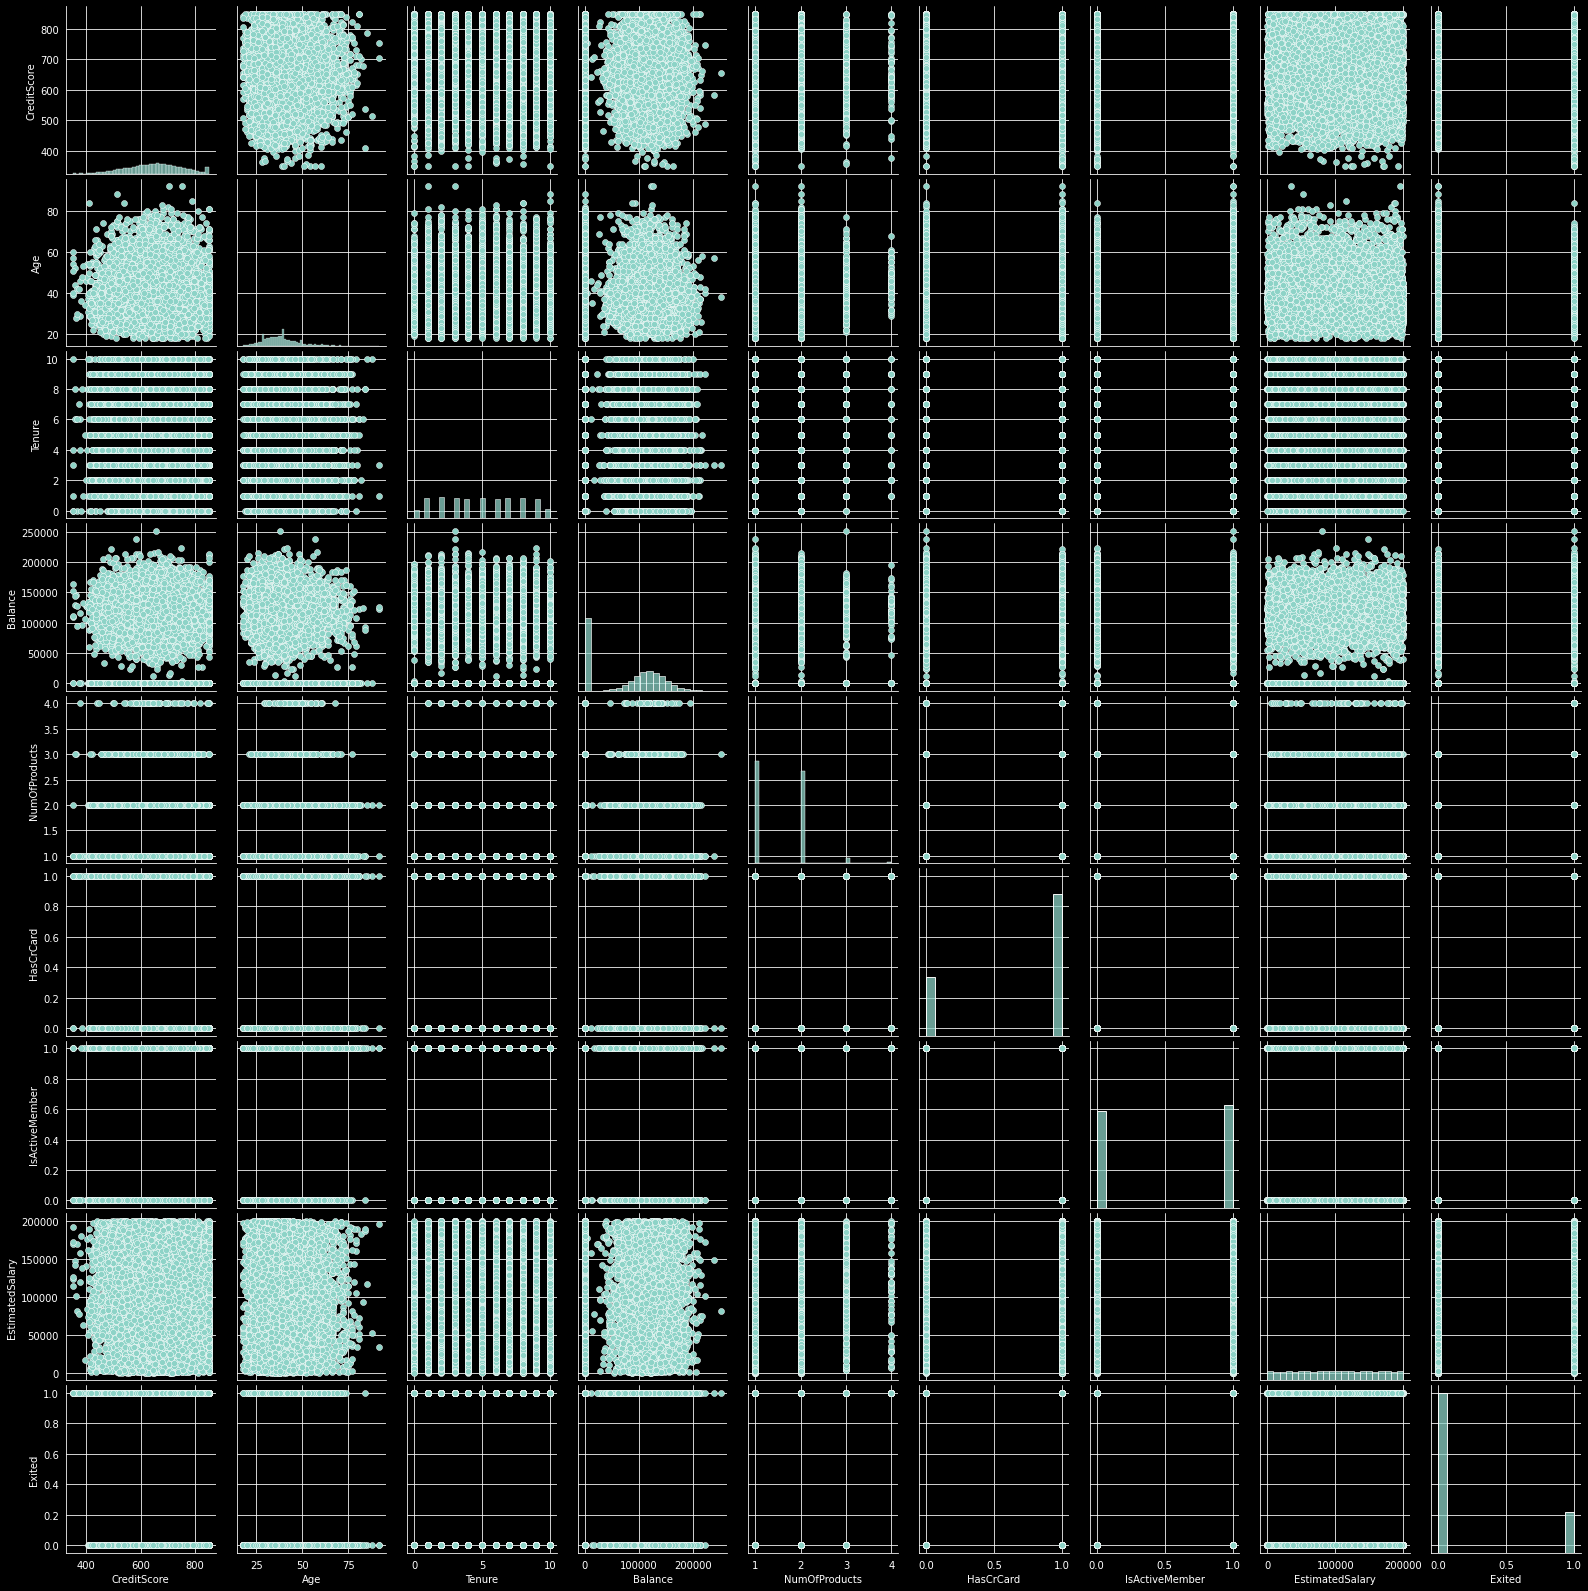

In [38]:
sns.pairplot(df2);

In [40]:
df2.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


In [41]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770
9997,709,France,Female,36,7,0.000,1,0,1,42085.580
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520


In [42]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [43]:
X_train.shape

(8000, 10)

In [44]:
X_test.shape

(2000, 10)

In [45]:
scaler = MinMaxScaler()

In [48]:
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

# Modelling & Model Performance

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
#help(Sequential)
#help(Dense)

In [57]:
X_train_new.shape

(8000, 13)

In [58]:
seed = 40
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train_new.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 24)                336       
                                                                 
 dense_6 (Dense)             (None, 24)                600       
                                                                 
 dense_7 (Dense)             (None, 12)                300       
                                                                 
 dense_8 (Dense)             (None, 6)                 78        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[ 0.03634781,  0.20851165,  0.27081668, -0.0847699 ,  0.17719388,
          0.11297715, -0.2746814 ,  0.0574083 , -0.07149991, -0.24972387,
         -0.21643454,  0.23160106, -0.25123054,  0.24427646, -0.30002707,
         -0.05429143,  0.39305705,  0.27798635,  0.38640922,  0.39889646,
          0.10339731,  0.29347795,  0.3624751 , -0.06819469],
        [-0.08956069, -0.12918857, -0.10927001,  0.23531109,  0.3296473 ,
          0.11754996, -0.03641003, -0.10719687, -0.21784405,  0.03754237,
          0.35210115, -0.37036526,  0.26437092, -0.03697342,  0.3571192 ,
         -0.2337326 , -0.30001995,  0.37584883,  0.3786561 ,  0.05511424,
          0.3984884 , -0.08088833, -0.13985035,  0.09234428],
        [-0.20715329, -0.37770605, -0.3846036 , -0.17004037,  0.3577063 ,
         -0.30633336,  0.00213775, -0.37379867,  0.27114552,  0.06822252,
         -0.3209297 , -0.3057601 ,  0.21005028, -0.18865357, -0.14

In [62]:
model.fit(x = X_train_new, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
54/54 [==============================] - 1s 7ms/step - loss: 0.1567 - val_loss: 0.1440
Epoch 2/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1481 - val_loss: 0.1412
Epoch 3/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1432 - val_loss: 0.1365
Epoch 4/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1389 - val_loss: 0.1328
Epoch 5/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1345 - val_loss: 0.1305
Epoch 6/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1316 - val_loss: 0.1270
Epoch 7/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1279 - val_loss: 0.1235
Epoch 8/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1245 - val_loss: 0.1205
Epoch 9/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1206 - val_loss: 0.1179
Epoch 10/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1183 - val_loss: 0.1141

In [63]:
model.weights

[<tf.Variable 'dense_5/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[ 1.74992114e-01,  2.51327157e-01,  7.25431681e-01,
          2.40797922e-01,  4.18751150e-01, -1.22582936e-03,
         -3.33685398e-01,  3.30491155e-01, -1.57418877e-01,
         -1.21503428e-01, -9.58317593e-02,  3.52188915e-01,
          2.26585288e-02,  3.47347915e-01,  9.74681228e-02,
          1.56001851e-01,  6.72648489e-01,  5.32753229e-01,
          3.53448927e-01,  5.12230039e-01, -9.96884890e-04,
          4.17179525e-01,  9.03771400e-01,  2.05850422e-01],
        [-1.02653039e+00, -3.26842576e-01,  1.68660790e-01,
         -1.15286976e-01,  7.77634978e-01,  5.24450183e-01,
         -1.16789676e-01, -8.19469988e-02, -3.29717457e-01,
          5.38131535e-01,  9.40221131e-01, -8.13275456e-01,
         -9.17974561e-02,  2.77228951e-01,  5.36555886e-01,
         -4.56893504e-01, -3.59197259e-01,  6.65643930e-01,
          1.20343363e+00, -3.76576513e-01,  7.95370579e-01,
         -4.41700190e-01, -5.

In [64]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.157,0.144
1,0.148,0.141
2,0.143,0.136
3,0.139,0.133
4,0.135,0.131
...,...,...
995,0.071,0.126
996,0.069,0.129
997,0.068,0.131
998,0.070,0.129


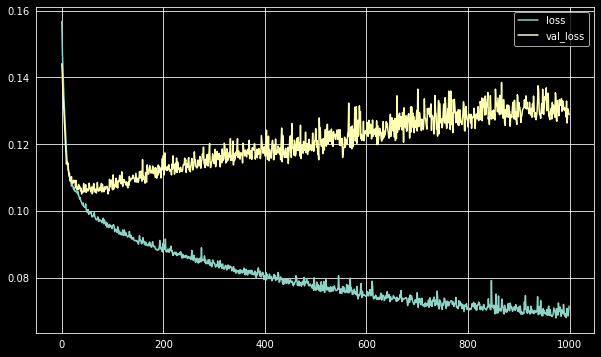

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
model.evaluate(X_train_new, y_train, verbose=1)

250/250 [==============================] - 0s 2ms/step - loss: 0.0755


0.07552468776702881

In [70]:
model.evaluate(X_test_new, y_test, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 0.1285


0.12848994135856628

In [71]:
y_pred = model.predict(X_test_new)

63/63 [==============================] - 0s 2ms/step


In [72]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
9433,0,0.029
9306,0,0.043
3681,1,0.088
2423,0,0.029
4518,0,0.029
5369,1,0.763
6871,1,0.846
8493,1,1.152
6639,0,0.242
5155,0,0.029


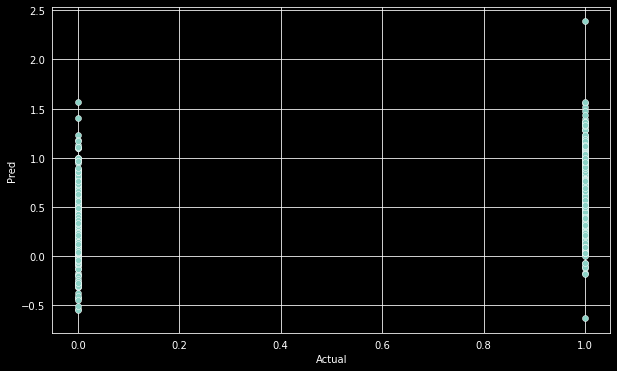

In [73]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [74]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [75]:
eval_metric(y_test, y_pred)

r2_score: 0.2295277466395157 
mae: 0.21179497952293605 
mse: 0.12848992413035792 
rmse: 0.358454912269811


**Learnin Rate**

In [86]:
from tensorflow.keras.optimizers import Adam

In [80]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train_new.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [81]:
model.weights

[<tf.Variable 'dense_15/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[ 0.03634781,  0.20851165,  0.27081668, -0.0847699 ,  0.17719388,
          0.11297715, -0.2746814 ,  0.0574083 , -0.07149991, -0.24972387,
         -0.21643454,  0.23160106, -0.25123054,  0.24427646, -0.30002707,
         -0.05429143,  0.39305705,  0.27798635,  0.38640922,  0.39889646,
          0.10339731,  0.29347795,  0.3624751 , -0.06819469],
        [-0.08956069, -0.12918857, -0.10927001,  0.23531109,  0.3296473 ,
          0.11754996, -0.03641003, -0.10719687, -0.21784405,  0.03754237,
          0.35210115, -0.37036526,  0.26437092, -0.03697342,  0.3571192 ,
         -0.2337326 , -0.30001995,  0.37584883,  0.3786561 ,  0.05511424,
          0.3984884 , -0.08088833, -0.13985035,  0.09234428],
        [-0.20715329, -0.37770605, -0.3846036 , -0.17004037,  0.3577063 ,
         -0.30633336,  0.00213775, -0.37379867,  0.27114552,  0.06822252,
         -0.3209297 , -0.3057601 ,  0.21005028, -0.18865357, -0.1

In [82]:
model.fit(x = X_train_new, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
54/54 [==============================] - 1s 6ms/step - loss: 0.1521 - val_loss: 0.1372
Epoch 2/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1415 - val_loss: 0.1336
Epoch 3/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.1246
Epoch 4/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1265 - val_loss: 0.1233
Epoch 5/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1190 - val_loss: 0.1125
Epoch 6/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.1160
Epoch 7/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1130 - val_loss: 0.1089
Epoch 8/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1106 - val_loss: 0.1101
Epoch 9/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1088
Epoch 10/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.1092

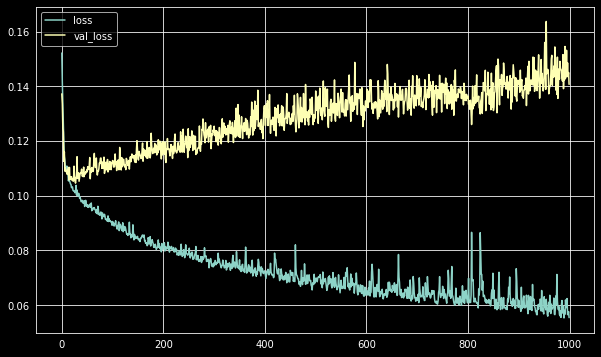

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [84]:
y_pred = model.predict(X_test_new)

63/63 [==============================] - 0s 5ms/step


In [85]:
eval_metric(y_test, y_pred)

r2_score: 0.1287161687487931 
mae: 0.21418167677242309 
mse: 0.1453020441491435 
rmse: 0.38118505236845723


## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

In [99]:
from tensorflow.keras.layers import Dropout

In [100]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train_new.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [101]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [102]:
model.fit(x = X_train_new, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
54/54 [==============================] - 1s 6ms/step - loss: 0.1669 - val_loss: 0.1485
Epoch 2/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1573 - val_loss: 0.1437
Epoch 3/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1546 - val_loss: 0.1421
Epoch 4/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1514 - val_loss: 0.1387
Epoch 5/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1495 - val_loss: 0.1370
Epoch 6/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1467 - val_loss: 0.1324
Epoch 7/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1420 - val_loss: 0.1276
Epoch 8/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1384 - val_loss: 0.1229
Epoch 9/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1377 - val_loss: 0.1272
Epoch 10/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1333 - val_loss: 0.1184

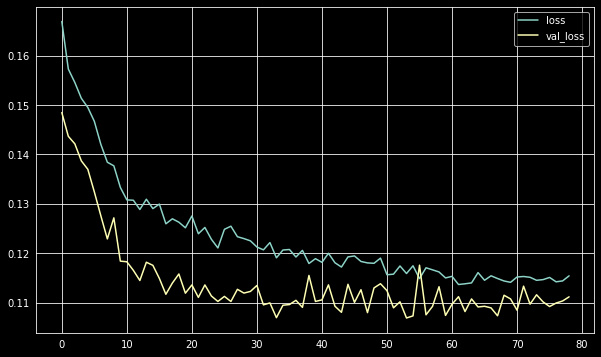

In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [105]:
y_pred = model.predict(X_test_new)

63/63 [==============================] - 0s 1ms/step


In [106]:
eval_metric(y_test, y_pred)

r2_score: 0.3507796190827477 
mae: 0.2343168113194406 
mse: 0.10826902217971311 
rmse: 0.32904258414331894


### Add Early Stop

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train_new.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [92]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [93]:
model.fit(x = X_train_new, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
54/54 [==============================] - 1s 6ms/step - loss: 0.1521 - val_loss: 0.1372
Epoch 2/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1415 - val_loss: 0.1336
Epoch 3/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.1246
Epoch 4/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1265 - val_loss: 0.1233
Epoch 5/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1190 - val_loss: 0.1125
Epoch 6/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.1160
Epoch 7/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1130 - val_loss: 0.1089
Epoch 8/1000
54/54 [==============================] - 0s 4ms/step - loss: 0.1106 - val_loss: 0.1101
Epoch 9/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1088
Epoch 10/1000
54/54 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.1092

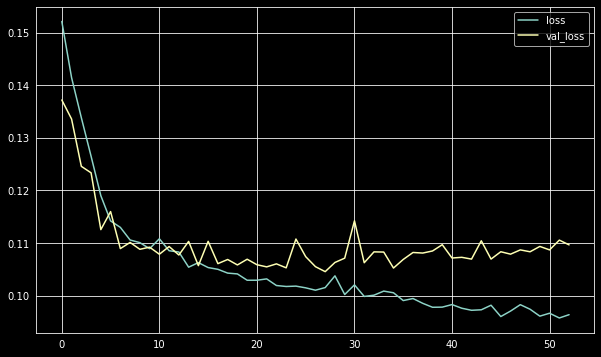

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
y_pred = model.predict(X_test_new)

63/63 [==============================] - 0s 2ms/step


In [97]:
eval_metric(y_test, y_pred)

r2_score: 0.3880498077439186 
mae: 0.21273748273411183 
mse: 0.10205355667461413 
rmse: 0.31945822367660864


#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Final Model and Model Deployment

In [119]:
import pickle
pickle.dump(scaler, open("scaler_bank", 'wb'))

In [120]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train_new.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [121]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [122]:
model.fit(x = X_train_new, y = y_train, validation_data = (X_test_new, y_test), batch_size = 128, epochs = 1500,callbacks = [early_stop])



Epoch 1/1500
63/63 [==============================] - 1s 5ms/step - loss: 0.1512 - val_loss: 0.1485
Epoch 2/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1397 - val_loss: 0.1369
Epoch 3/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1328 - val_loss: 0.1311
Epoch 4/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1254 - val_loss: 0.1218
Epoch 5/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1176 - val_loss: 0.1204
Epoch 6/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1162 - val_loss: 0.1103
Epoch 7/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1110 - val_loss: 0.1122
Epoch 8/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1094 - val_loss: 0.1082
Epoch 9/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1092 - val_loss: 0.1068
Epoch 10/1500
63/63 [==============================] - 0s 3ms/step - loss: 0.1069 - val_loss: 0.1053

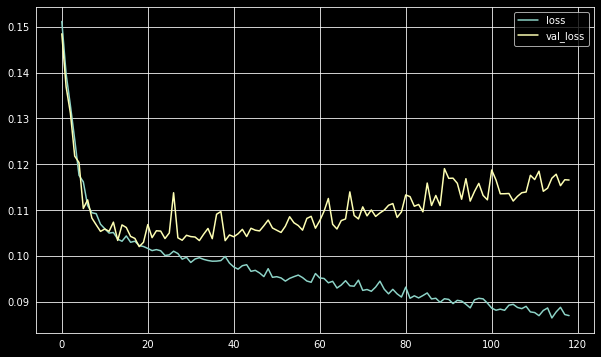

In [123]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [124]:
y_pred = model.predict(X_test_new)

63/63 [==============================] - 0s 1ms/step


In [125]:
model.save('model_bank.h5')

### **LOAD MODEL**

In [126]:
from tensorflow.keras.models import load_model

In [127]:
model_bank = load_model('model_bank.h5')
scaler_bank = pickle.load(open("scaler_bank", "rb"))

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___